In [230]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [231]:
alcohol= pd.read_csv("/home/jerome/Documents/CSV FILE/Alcohol_Sales.csv")
CS = pd.read_csv("/home/jerome/Documents/CSV FILE/ComputerSales.csv")
IEA = pd.read_csv("/home/jerome/Documents/CSV FILE/IEA-EV-dataEV salesCarsHistorical - Copy.csv")
Death = pd.read_csv("/home/jerome/Documents/CSV FILE/NCHS_-_Death_rates_and_life_expectancy_at_birth.csv")
Beer = pd.read_csv("/home/jerome/Documents/CSV FILE/BeerWineLiquor.csv")
Booking = pd.read_csv("/home/jerome/Documents/CSV FILE/hotel_bookings.csv")


In [232]:
alcohol

,DATE,S4248SM144NCEN
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221
...,...,...
320,2018-09-01,12396
321,2018-10-01,13914
322,2018-11-01,14174
323,2018-12-01,15504


In [233]:
alcohol.tail()

,DATE,S4248SM144NCEN
320,2018-09-01,12396
321,2018-10-01,13914
322,2018-11-01,14174
323,2018-12-01,15504
324,2019-01-01,10718


In [234]:
alcohol = alcohol[:324]
alcohol.tail()

,DATE,S4248SM144NCEN
319,2018-08-01,14257
320,2018-09-01,12396
321,2018-10-01,13914
322,2018-11-01,14174
323,2018-12-01,15504


In [235]:
alcohol.duplicated().sum()

np.int64(0)

In [236]:
alcohol.isna().sum()

DATE              0
S4248SM144NCEN    0
dtype: int64

In [237]:
alcohol = alcohol.rename(columns={ "DATE" : "ds", "S4248SM144NCEN": "y"} )

In [238]:
alcohol

,ds,y
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221
...,...,...
319,2018-08-01,14257
320,2018-09-01,12396
321,2018-10-01,13914
322,2018-11-01,14174


In [239]:
from prophet import Prophet 

In [240]:
model = Prophet()

model.fit(alcohol)

14:02:31 - cmdstanpy - INFO - Chain [1] start processing


14:02:31 - cmdstanpy - INFO - Chain [1] done processing


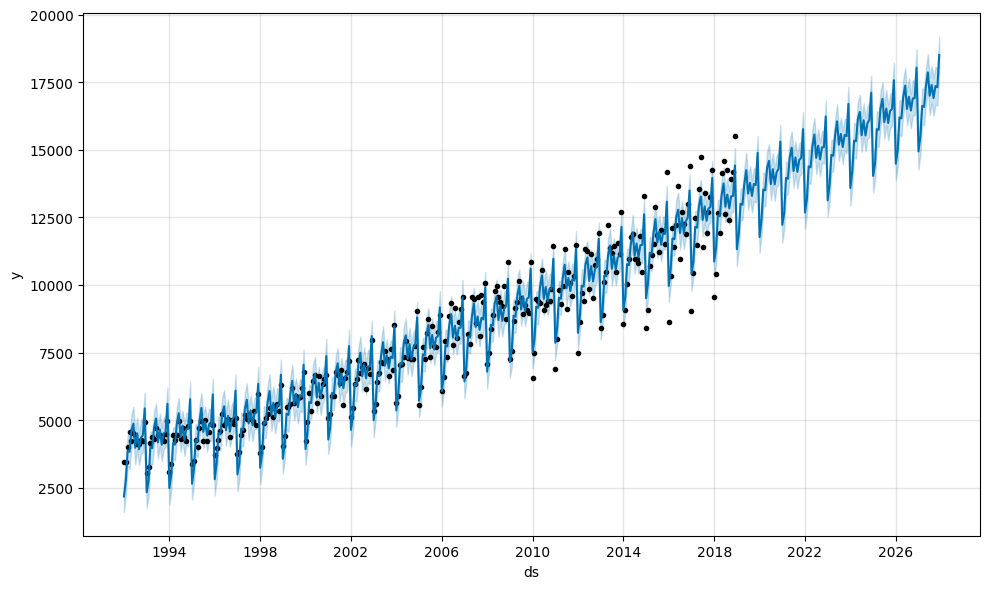

In [260]:
future = model.make_future_dataframe(periods = 108, freq = "MS")
forcast = model.predict(future)
model.plot(forcast)
plt.show()

In [242]:
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,4011.613488,1601.207405,2797.461741,4011.613488,4011.613488,-1834.271757,-1834.271757,-1834.271757,-1834.271757,-1834.271757,-1834.271757,0.0,0.0,0.0,2177.341731
1,1992-02-01,4025.119506,2128.300069,3362.377359,4025.119506,4025.119506,-1253.180141,-1253.180141,-1253.180141,-1253.180141,-1253.180141,-1253.180141,0.0,0.0,0.0,2771.939365
2,1992-03-01,4037.754169,3267.048643,4488.089404,4037.754169,4037.754169,-155.144051,-155.144051,-155.144051,-155.144051,-155.144051,-155.144051,0.0,0.0,0.0,3882.610117
3,1992-04-01,4051.260187,3255.526005,4379.291674,4051.260187,4051.260187,-218.800368,-218.800368,-218.800368,-218.800368,-218.800368,-218.800368,0.0,0.0,0.0,3832.459819
4,1992-05-01,4064.330528,4062.711719,5247.658881,4064.330528,4064.330528,568.825615,568.825615,568.825615,568.825615,568.825615,568.825615,0.0,0.0,0.0,4633.156143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,2027-08-01,17041.771149,16741.174129,18113.602311,16766.570661,17333.986965,356.672702,356.672702,356.672702,356.672702,356.672702,356.672702,0.0,0.0,0.0,17398.443851
428,2027-09-01,17080.159151,16225.332629,17564.918267,16799.015690,17376.881237,-164.188509,-164.188509,-164.188509,-164.188509,-164.188509,-164.188509,0.0,0.0,0.0,16915.970643
429,2027-10-01,17117.308831,16692.017522,18092.055551,16837.728187,17414.828919,241.920347,241.920347,241.920347,241.920347,241.920347,241.920347,0.0,0.0,0.0,17359.229178
430,2027-11-01,17155.696834,16676.960190,18017.254098,16876.391801,17455.830239,161.901466,161.901466,161.901466,161.901466,161.901466,161.901466,0.0,0.0,0.0,17317.598299


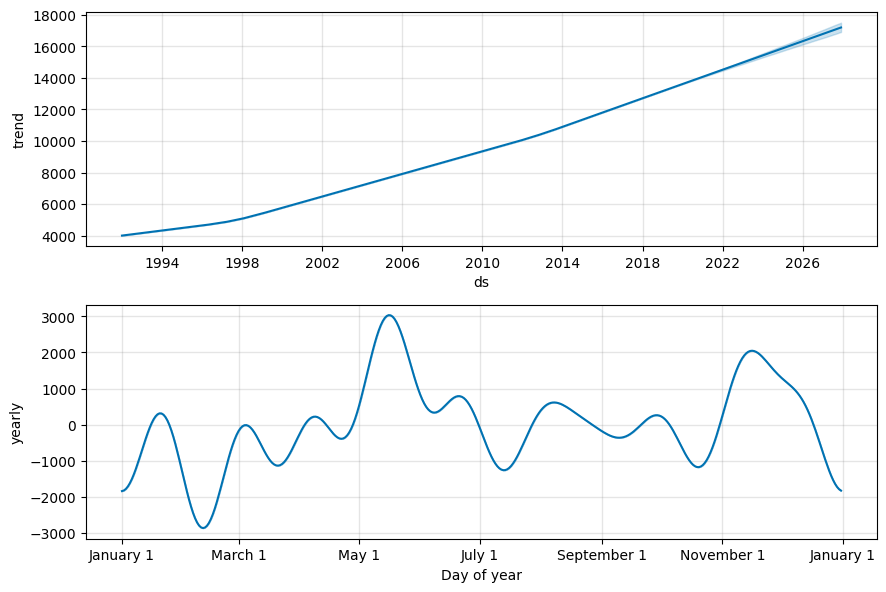

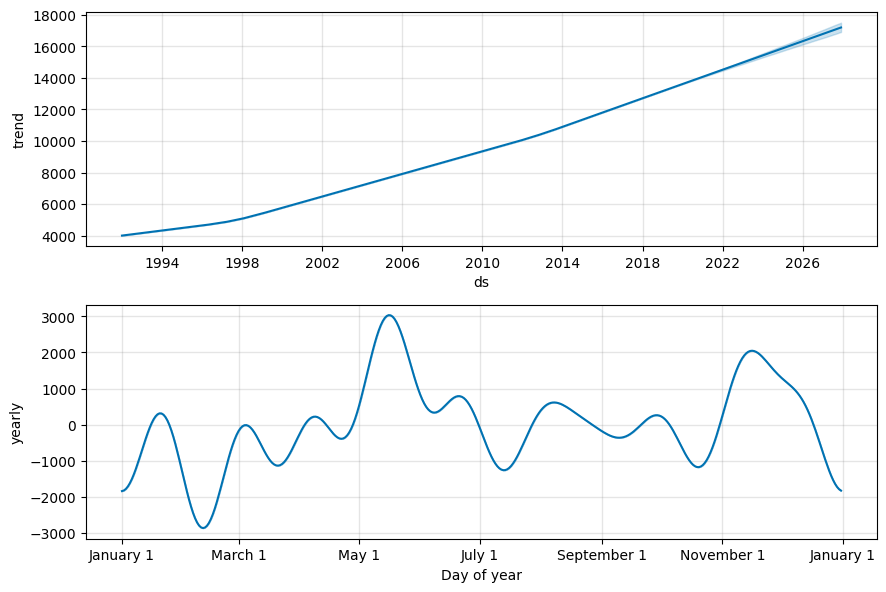

In [243]:
model.plot_components(forcast)

In [244]:
Death

,Year,Race,Sex,Average Life Expectancy (Years),Age-adjusted Death Rate
0,1900.0,All Races,Both Sexes,47.3,2518.0
1,1901.0,All Races,Both Sexes,49.1,2473.1
2,1902.0,All Races,Both Sexes,51.5,2301.3
3,1903.0,All Races,Both Sexes,50.5,2379.0
4,1904.0,All Races,Both Sexes,47.6,2502.5
...,...,...,...,...,...
1066,NaN,NaN,NaN,NaN,NaN
1067,NaN,NaN,NaN,NaN,NaN
1068,NaN,NaN,NaN,NaN,NaN
1069,NaN,NaN,NaN,NaN,NaN


In [245]:
Death1 = Death[Death['Race'] == 'All Races']
Death2 = Death1[Death['Sex'] == 'Both Sexes'].sort_values(by = 'Year')

/tmp/ipykernel_3747/3617273664.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Death2 = Death1[Death['Sex'] == 'Both Sexes'].sort_values(by = 'Year')


In [246]:
Death2.duplicated().sum()  

np.int64(0)

In [247]:
Death2

,Year,Race,Sex,Average Life Expectancy (Years),Age-adjusted Death Rate
0,1900.0,All Races,Both Sexes,47.3,2518.0
1,1901.0,All Races,Both Sexes,49.1,2473.1
2,1902.0,All Races,Both Sexes,51.5,2301.3
3,1903.0,All Races,Both Sexes,50.5,2379.0
4,1904.0,All Races,Both Sexes,47.6,2502.5
...,...,...,...,...,...
114,2014.0,All Races,Both Sexes,78.9,724.6
115,2015.0,All Races,Both Sexes,78.7,733.1
116,2016.0,All Races,Both Sexes,78.7,728.8
117,2017.0,All Races,Both Sexes,78.6,731.9


In [248]:
Death2 =  Death2.iloc[:,[0,4]]

In [249]:
Death2

,Year,Age-adjusted Death Rate
0,1900.0,2518.0
1,1901.0,2473.1
2,1902.0,2301.3
3,1903.0,2379.0
4,1904.0,2502.5
...,...,...
114,2014.0,724.6
115,2015.0,733.1
116,2016.0,728.8
117,2017.0,731.9


In [250]:
Death2 = Death2.rename(columns={ "Year" : "ds", "Age-adjusted Death Rate": "y"} )

In [251]:
Death2['ds'] = pd.to_datetime(Death2['ds'], format='%Y')

In [252]:
Death2

,ds,y
0,1900-01-01,2518.0
1,1901-01-01,2473.1
2,1902-01-01,2301.3
3,1903-01-01,2379.0
4,1904-01-01,2502.5
...,...,...
114,2014-01-01,724.6
115,2015-01-01,733.1
116,2016-01-01,728.8
117,2017-01-01,731.9


In [253]:
model2 = Prophet()

model2.fit(Death2)

14:02:36 - cmdstanpy - INFO - Chain [1] start processing
14:02:36 - cmdstanpy - INFO - Chain [1] done processing


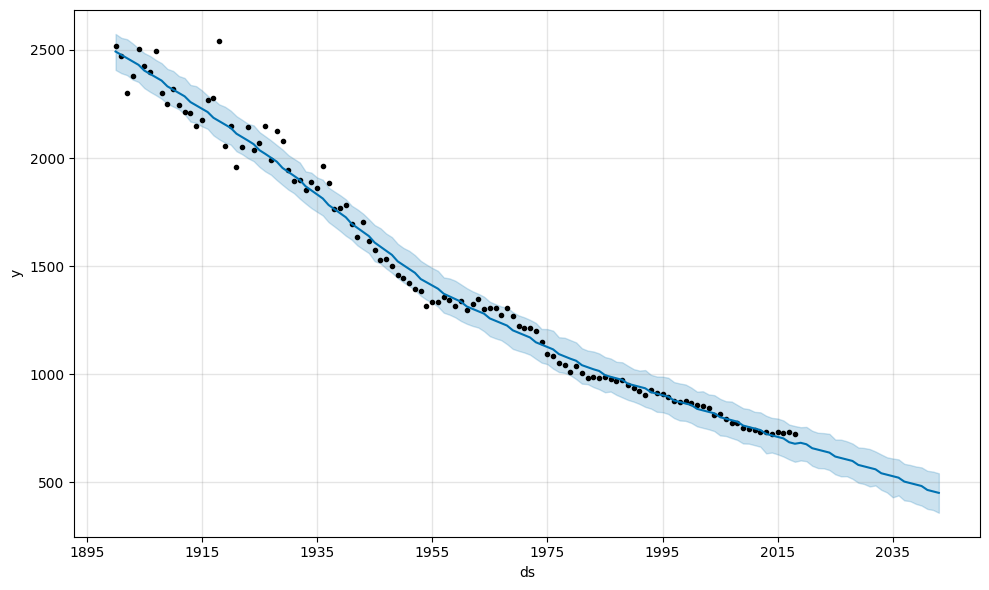

In [259]:
future2 = model2.make_future_dataframe(periods = 25, freq = "YE")
forcast2 = model2.predict(future2)
model2.plot(forcast2)
plt.show()

In [255]:
forcast2

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1900-01-01,2515.640098,2408.437711,2573.941103,2515.640098,2515.640098,-23.036292,-23.036292,-23.036292,-23.036292,-23.036292,-23.036292,0.0,0.0,0.0,2492.603806
1,1901-01-01,2497.475753,2401.681159,2564.318573,2497.475753,2497.475753,-20.353091,-20.353091,-20.353091,-20.353091,-20.353091,-20.353091,0.0,0.0,0.0,2477.122661
2,1902-01-01,2479.311408,2384.593314,2545.093539,2479.311408,2479.311408,-17.634871,-17.634871,-17.634871,-17.634871,-17.634871,-17.634871,0.0,0.0,0.0,2461.676536
3,1903-01-01,2461.147063,2362.168689,2527.412953,2461.147063,2461.147063,-14.884928,-14.884928,-14.884928,-14.884928,-14.884928,-14.884928,0.0,0.0,0.0,2446.262134
4,1904-01-01,2442.982718,2350.593380,2513.421451,2442.982718,2442.982718,-12.106609,-12.106609,-12.106609,-12.106609,-12.106609,-12.106609,0.0,0.0,0.0,2430.876109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2038-12-31,494.148626,404.667110,578.003025,466.454068,520.326804,-3.635485,-3.635485,-3.635485,-3.635485,-3.635485,-3.635485,0.0,0.0,0.0,490.513142
140,2039-12-31,484.506161,395.961923,572.457754,454.874786,512.617128,-0.777931,-0.777931,-0.777931,-0.777931,-0.777931,-0.777931,0.0,0.0,0.0,483.728230
141,2040-12-31,474.837278,371.406392,557.004156,443.274443,505.146828,-9.303302,-9.303302,-9.303302,-9.303302,-9.303302,-9.303302,0.0,0.0,0.0,465.533976
142,2041-12-31,465.194813,374.430339,537.632848,431.396170,497.934960,-6.478440,-6.478440,-6.478440,-6.478440,-6.478440,-6.478440,0.0,0.0,0.0,458.716373


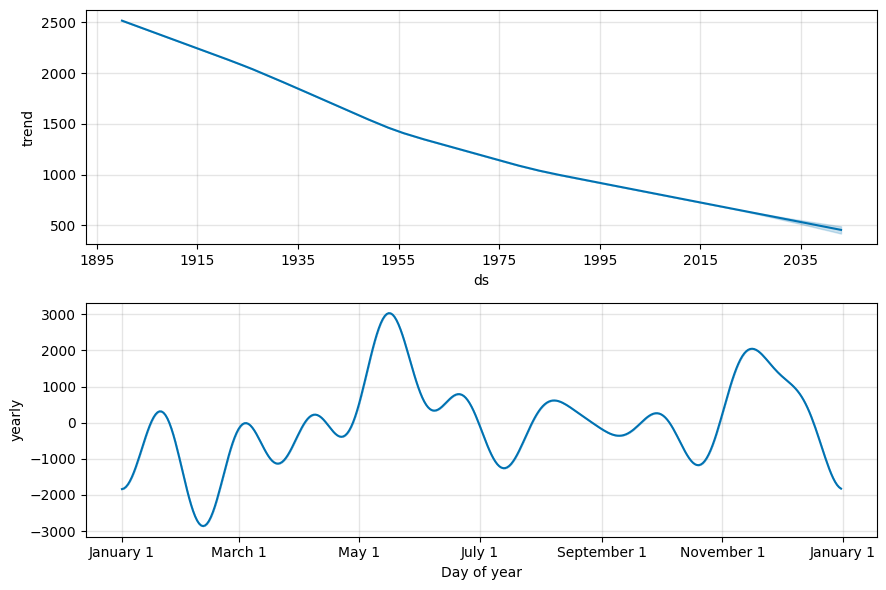

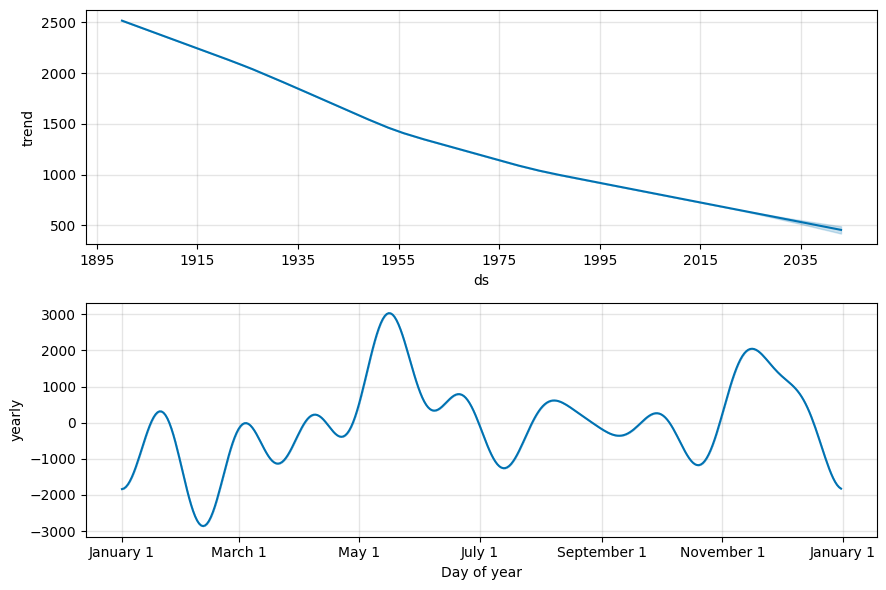

In [257]:
model.plot_components(forcast2)